# Data visualization with pandas, seaborn and scikit-plot

In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scikitplot as skplt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits as load_data
from sklearn.cluster import KMeans
import multiprocessing

n_cpu = multiprocessing.cpu_count()
sns.set_style("darkgrid")

## Using pandas plot

In [2]:
df = pd.read_csv('data/spotify.csv', index_col='Date', parse_dates=True)
df.head()

,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable
Date,,,,,
2017-01-06,12287078,NaN,NaN,NaN,NaN
2017-01-07,13190270,NaN,NaN,NaN,NaN
2017-01-08,13099919,NaN,NaN,NaN,NaN
2017-01-09,14506351,NaN,NaN,NaN,NaN
2017-01-10,14275628,NaN,NaN,NaN,NaN


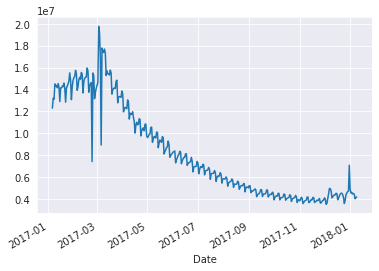

In [3]:
df["Shape of You"].plot()

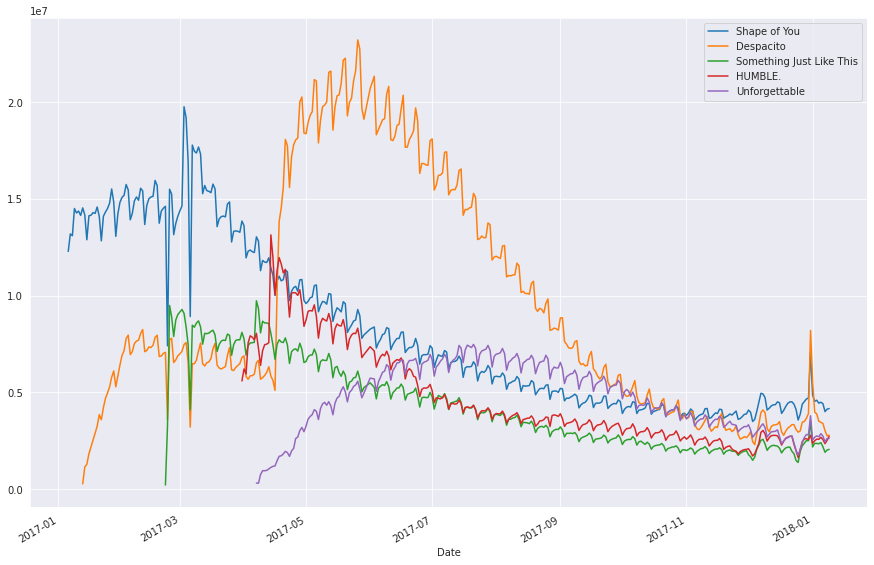

In [4]:
df.plot(figsize=(15, 10))

## Line plot

Line charts are best to show trends over a period of time and multiple lines can be used to show trends in more than one group

In [5]:
df = pd.read_csv('data/spotify.csv', index_col='Date', parse_dates=True)
df.head()

,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable
Date,,,,,
2017-01-06,12287078,NaN,NaN,NaN,NaN
2017-01-07,13190270,NaN,NaN,NaN,NaN
2017-01-08,13099919,NaN,NaN,NaN,NaN
2017-01-09,14506351,NaN,NaN,NaN,NaN
2017-01-10,14275628,NaN,NaN,NaN,NaN


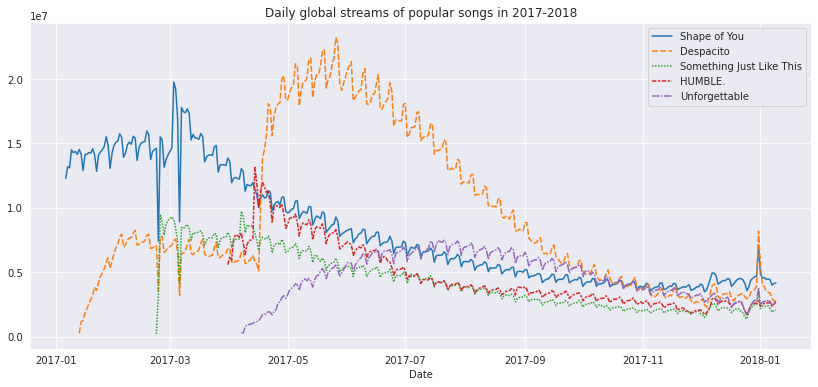

In [6]:
plt.figure(figsize=(14,6))
plt.title("Daily global streams of popular songs in 2017-2018")

sns.lineplot(data=df)

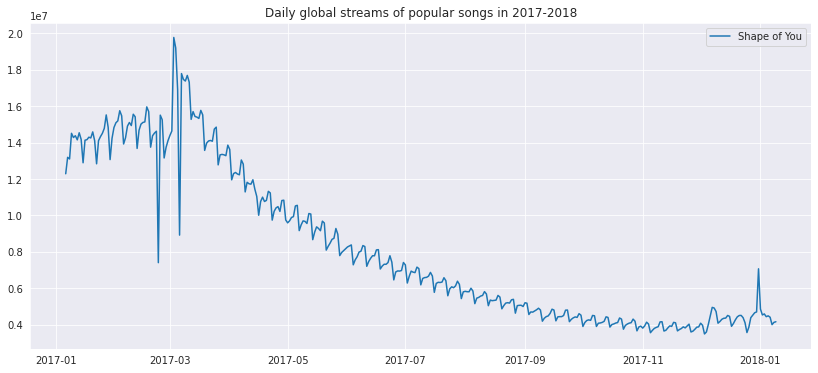

In [7]:
song = "Shape of You"

plt.figure(figsize=(14,6))
plt.title("Daily global streams of popular songs in 2017-2018")

sns.lineplot(data=df[song], label=song)

## Bar charts

Bar charts are useful for comparing quantities corresponding to different groups

In [8]:
data = pd.read_csv('data/flight_delays.csv')
data.head()

,Month,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
0,1,6.955843,-0.320888,7.347281,-2.043847,8.537497,18.357238,3.512640,18.164974,11.398054,10.889894,6.352729,3.107457,1.420702,3.389466
1,2,7.530204,-0.782923,18.657673,5.614745,10.417236,27.424179,6.029967,21.301627,16.474466,9.588895,7.260662,7.114455,7.784410,3.501363
2,3,6.693587,-0.544731,10.741317,2.077965,6.730101,20.074855,3.468383,11.018418,10.039118,3.181693,4.892212,3.330787,5.348207,3.263341
3,4,4.931778,-3.009003,2.780105,0.083343,4.821253,12.640440,0.011022,5.131228,8.766224,3.223796,4.376092,2.660290,0.995507,2.996399
4,5,5.173878,-1.716398,-0.709019,0.149333,7.724290,13.007554,0.826426,5.466790,22.397347,4.141162,6.827695,0.681605,7.102021,5.680777


Text(0, 0.5, 'Arrival delay (in minutes)')

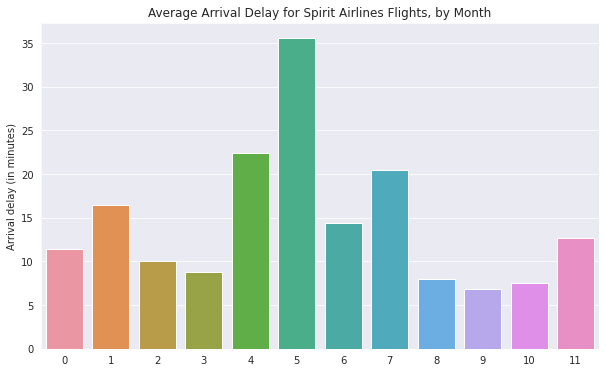

In [9]:
plt.figure(figsize=(10,6))
plt.title("Average Arrival Delay for Spirit Airlines Flights, by Month")
sns.barplot(x=data.index, y=data['NK'])
plt.ylabel("Arrival delay (in minutes)")

## Heatmaps

Heatmaps can be used to find color coded patterns in tables of numbers

In [10]:
data = pd.read_csv('data/flight_delays.csv')
data.head()

,Month,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
0,1,6.955843,-0.320888,7.347281,-2.043847,8.537497,18.357238,3.512640,18.164974,11.398054,10.889894,6.352729,3.107457,1.420702,3.389466
1,2,7.530204,-0.782923,18.657673,5.614745,10.417236,27.424179,6.029967,21.301627,16.474466,9.588895,7.260662,7.114455,7.784410,3.501363
2,3,6.693587,-0.544731,10.741317,2.077965,6.730101,20.074855,3.468383,11.018418,10.039118,3.181693,4.892212,3.330787,5.348207,3.263341
3,4,4.931778,-3.009003,2.780105,0.083343,4.821253,12.640440,0.011022,5.131228,8.766224,3.223796,4.376092,2.660290,0.995507,2.996399
4,5,5.173878,-1.716398,-0.709019,0.149333,7.724290,13.007554,0.826426,5.466790,22.397347,4.141162,6.827695,0.681605,7.102021,5.680777


Text(0.5, 42.0, 'Airline')

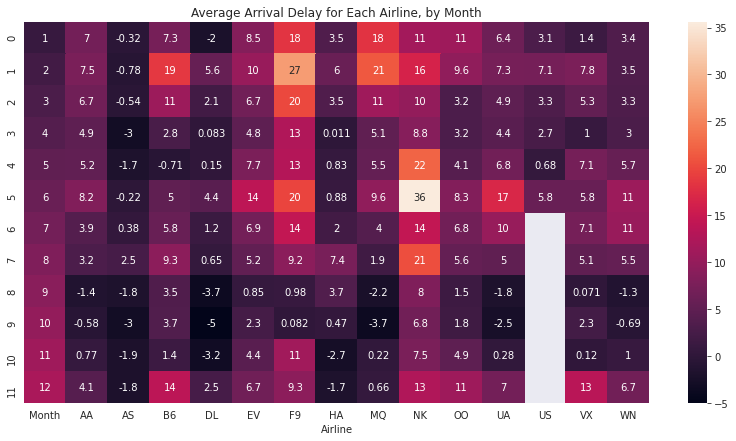

In [11]:
plt.figure(figsize=(14,7))
plt.title("Average Arrival Delay for Each Airline, by Month")
sns.heatmap(data=data, annot=True)
plt.xlabel("Airline")

## Scatter plots

Scatter plots show the relationship between two continuous variables; if color coded we can also show the relationship with a third categorical variable

In [12]:
data = pd.read_csv('data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


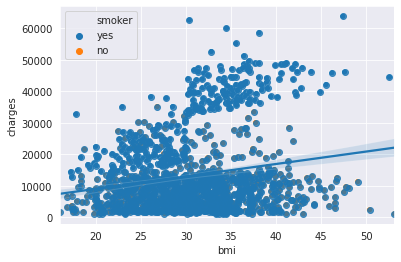

In [13]:
sns.scatterplot(x=data['bmi'], y=data['charges'], hue=data['smoker'])
sns.regplot(x=data["bmi"], y=data["charges"])

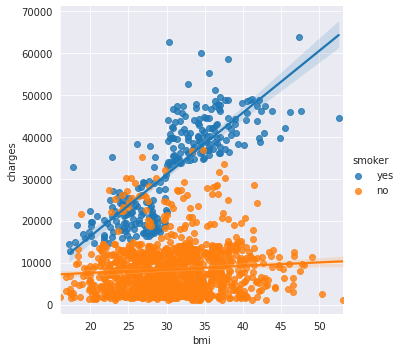

In [14]:
# multiple color coded and regression lines
sns.lmplot(x="bmi", y="charges", hue="smoker", data=data)

## Swarm plot

Categorical scatter plots show the relationship between a continous variable and a categorical variable

In [15]:
data = pd.read_csv('data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


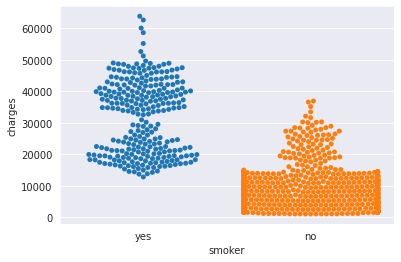

In [16]:
sns.swarmplot(x=data['smoker'],
              y=data['charges'])

## Box plot

Displays groups of numerical data through their quartiles

In [17]:
data = pd.read_csv('data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


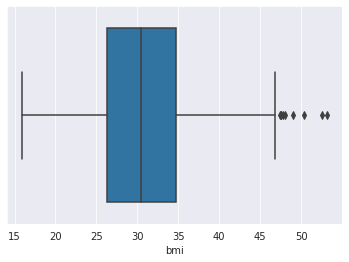

In [18]:
sns.boxplot(x=data.bmi)

## Histograms

Histograms show the distribution of a single numerical variable

In [19]:
data = pd.read_csv('data/iris.csv', index_col="Id")
data.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


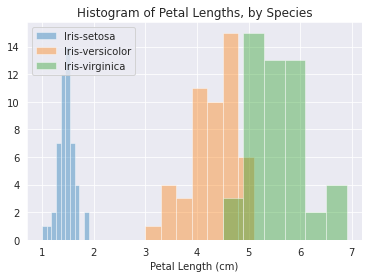

In [20]:
sns.distplot(a=data[data.Species == 'Iris-setosa']["Petal Length (cm)"], label="Iris-setosa", kde=False)
sns.distplot(a=data[data.Species == 'Iris-versicolor']["Petal Length (cm)"], label="Iris-versicolor", kde=False)
sns.distplot(a=data[data.Species == 'Iris-virginica']["Petal Length (cm)"], label="Iris-virginica", kde=False)

plt.title("Histogram of Petal Lengths, by Species")
plt.legend()

## Density plot

Kernel Density Estimate plots (1D and 2D) show an estimated, smooth distribution of a single numerical variable (or two numerical variables)

In [21]:
data = pd.read_csv('data/iris.csv', index_col="Id")
data.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


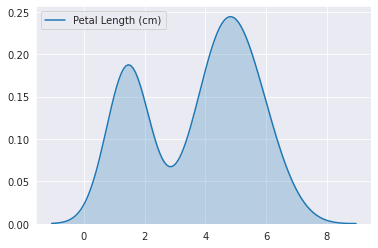

In [22]:
sns.kdeplot(data=data['Petal Length (cm)'], shade=True)

Text(0.5, 1.0, 'Distribution of Petal Lengths, by Species')

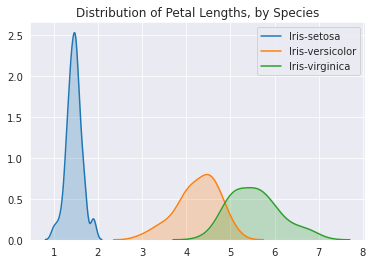

In [23]:
sns.kdeplot(data=data[data.Species == 'Iris-setosa']["Petal Length (cm)"], label="Iris-setosa", shade=True)
sns.kdeplot(data=data[data.Species == 'Iris-versicolor']["Petal Length (cm)"], label="Iris-versicolor", shade=True)
sns.kdeplot(data=data[data.Species == 'Iris-virginica']["Petal Length (cm)"], label="Iris-virginica", shade=True)

plt.title("Distribution of Petal Lengths, by Species")

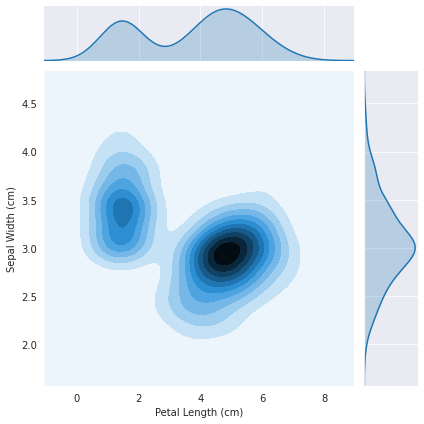

In [24]:
sns.jointplot(x=data['Petal Length (cm)'], y=data['Sepal Width (cm)'], kind="kde")

## Confusion Matrix

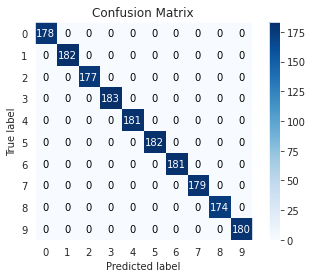

In [25]:
X, y = load_data(return_X_y=True)
rf = RandomForestClassifier()
rf.fit(X, y)
preds = rf.predict(X)
skplt.metrics.plot_confusion_matrix(y_true=y, y_pred=preds)
plt.show()

## Elbow curve

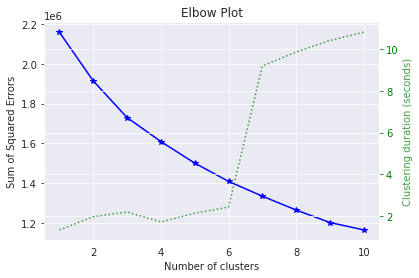

In [26]:
X, y = load_data(return_X_y=True)
kmeans = KMeans(random_state=1)
skplt.cluster.plot_elbow_curve(kmeans, X, cluster_ranges=range(1, 11))

## Learning curve


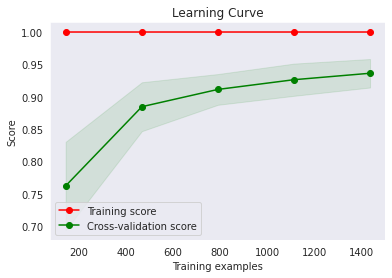

In [27]:
X, y = load_data(return_X_y=True)
rf = RandomForestClassifier()
skplt.estimators.plot_learning_curve(rf, X, y)

## ROC AUC

should only be used on balanced dataset. Value between 0.5 and 1.0, closer to 1.0 is better.

In [28]:
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [29]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

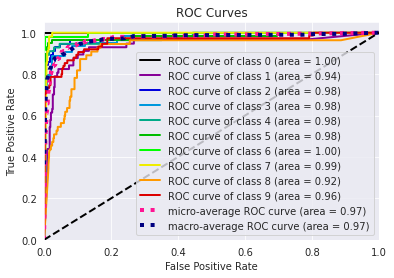

In [30]:
predicted_probas = model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, predicted_probas)

## Precision-Recall curve

should be used for imbalanced dataset.

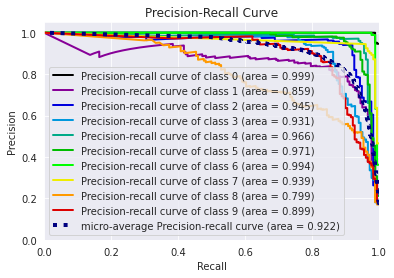

In [31]:
X, y = load_data(return_X_y=True)
nb = GaussianNB()
nb.fit(X, y)
probas = nb.predict_proba(X)
skplt.metrics.plot_precision_recall(y_true=y, y_probas=probas)